# Exercise 03 Classification Models

In this exercise, you need to follow the requirements of each question to generate the Python code, and the following example is for reference：

- Sample Question: Write a program that takes the user's name as input and prints "Hello, [name]!" where [name] is the user's input.

- Potential Answer:

```python
    name = input("Enter your name: ")
    print("Hello, " + name + "!")
```
- If you enter 'David', the code will output 'Hello, David!', and this will satisfy the requirements.

## Attention
- Generally, there will be multiple answers for one question and you don't have to strictly follow the instructions in the tutorial, as long as you can make the output of the code meet the requirements of the question.
- If possible, strive to make your code concise and avoid excessive reliance on less commonly used libraries.
- You may need to search for information on the Internet to complete the excercise.
- Please answer the questions in order.

## Question 01: The following code can generate a dataset and visualize them:

```python
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt

    np.random.seed(0)
    n_samples = 100
    overlap = 0.5  

    class_0_samples = int(n_samples * (1 - overlap))
    class_0 = np.random.normal(loc=[0.3, 0.7], scale=[0.15, 0.15], size=(class_0_samples, 2))
    labels_0 = np.zeros(class_0_samples)

    class_1_samples = int(n_samples * overlap)
    class_1 = np.random.normal(loc=[0.7, 0.3], scale=[0.15, 0.15], size=(class_1_samples, 2))
    labels_1 = np.ones(class_1_samples)

    data = np.vstack((class_0, class_1))
    labels = np.hstack((labels_0, labels_1))

    df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])
    df['Label'] = labels

    plt.figure(figsize=(8, 6))
    plt.scatter(df[df['Label']==0]['Feature1'], df[df['Label']==0]['Feature2'], marker='*', label='Label 0')
    plt.scatter(df[df['Label']==1]['Feature1'], df[df['Label']==1]['Feature2'], marker='*', label='Label 1')
    plt.title('Visualization of Data with Two Features')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()   
```

### Requirements

- First, copy all the code above in the following code frame to generate the data and visualize them.
- Divide the original dataset into train dataset (0.8) and test dataset (0.2), you can use sklearn to do this or write the code yourself.
- Use logistic regression to fit the dataset and value your model with accuracy_score and plot the ROC curve.

## Write your answer in the following code frame:

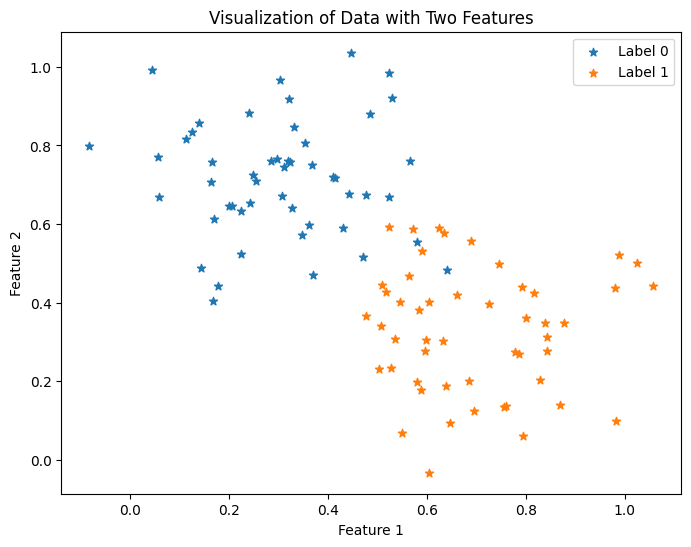

    Feature1  Feature2  Label
0   0.323242  0.756724    0.0
1   0.603457 -0.033510    1.0
2   0.309978  0.745371    0.0
3   0.534342  0.307825    1.0
4   0.631670  0.302622    1.0
..       ...       ...    ...
75  0.057915  0.668089    0.0
76  0.112081  0.816624    0.0
77  0.570816  0.586510    1.0
78  0.166832  0.402881    0.0
79  0.756464  0.135090    1.0

[80 rows x 3 columns]
    Feature1  Feature2  Label
0   0.323242  0.756724    0.0
1   0.603457 -0.033510    1.0
2   0.309978  0.745371    0.0
3   0.534342  0.307825    1.0
4   0.631670  0.302622    1.0
5   0.529917  0.920404    0.0
6   0.326614  0.639733    0.0
7   0.604623  0.401465    1.0
8   0.476817  0.673011    0.0
9   0.044059  0.992616    0.0
10  0.878204  0.347541    1.0
11  0.163905  0.707792    0.0
12  0.800844  0.361119    1.0
13  0.685232  0.200478    1.0
14  1.024485  0.500479    1.0
15  0.321607  0.918141    0.0
16  0.689764  0.557001    1.0
17  0.792112  0.438331    1.0
18  0.786489  0.268755    1.0
19  0.595815  0.2

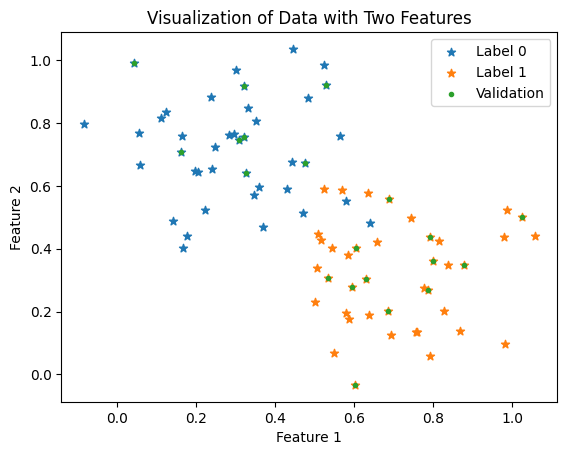

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Part I Copy and Visualise

np.random.seed(0)
n_samples = 100
overlap = 0.5 

class_0_samples = int(n_samples * (1 - overlap))
#! np.random.normal() parameters: loc = 'mean' of the distribution, scale = standard deviation, size (row , column)  = output shape 
class_0 = np.random.normal(loc=[0.3, 0.7], scale=[0.15, 0.15], size=(class_0_samples, 2))
labels_0 = np.zeros(class_0_samples)

class_1_samples = int(n_samples * overlap)
class_1 = np.random.normal(loc=[0.7, 0.3], scale=[0.15, 0.15], size=(class_1_samples, 2))
labels_1 = np.ones(class_1_samples)


# vstack puts them together in a new list
data = np.vstack((class_0, class_1))
# hstack puts them togehter in the same list
labels = np.hstack((labels_0, labels_1))

df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])
df['Label'] = labels

plt.figure(figsize=(8, 6))
plt.scatter(df[df['Label']==0]['Feature1'], df[df['Label']==0]['Feature2'], marker='*', label='Label 0')
plt.scatter(df[df['Label']==1]['Feature1'], df[df['Label']==1]['Feature2'], marker='*', label='Label 1')
plt.title('Visualization of Data with Two Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()   

# Part II Shuffle

df = df.sample(frac=1).reset_index(drop=True)
data_df_train = df.iloc[:80,:]
data_df_val = df.iloc[:20,:]
print(data_df_train)
print(data_df_val)

plt.scatter(data_df_train[data_df_train['Label']==0]['Feature1'], data_df_train[data_df_train['Label']==0]['Feature2'], marker='*', label='Label 0')
plt.scatter(data_df_train[data_df_train['Label']==1]['Feature1'], data_df_train[data_df_train['Label']==1]['Feature2'], marker='*', label='Label 1')
plt.scatter(data_df_val['Feature1'], data_df_val['Feature2'], marker='.', label='Validation')
plt.title('Visualization of Data with Two Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()  


## Question 02: As for the dataset generated (the same train data and test data) in question 01, change the classification model from linear regression to decision tree, then plot the tree, and evaluate the decision tree model with accuracy and ROC cureve.

## Question 03: The following code can generate a dataset and visualize them:

```python
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split

    X, y = make_classification(n_samples=50, n_features=2, n_informative=2, n_redundant=0,
                            n_clusters_per_class=1, random_state=42, class_sep=2.0)

    data = pd.DataFrame(data=X, columns=['Feature 1', 'Feature 2'])
    data['Target'] = y

    plt.scatter(data['Feature 1'], data['Feature 2'], c=data['Target'], cmap=plt.cm.Paired)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Linearly Separable SVM Classification Dataset')
    plt.show()
```

### Requirements

- First, copy all the code above in the following code frame to generate the data and visualize them.
- Divide the original dataset into train dataset (0.8) and test dataset (0.2), you can use sklearn to do this or write the code yourself.
- Use Support Vector Machine (SVM) model to fit the dataset and value your model with accuracy_score and plot the ROC curve.
- (optional) Plot the hyperplane of your SVM model (refer to the code in the tutorial).

## Write your answer in the following code frame:

## Question 04: As for the dataset generated (the same train data and test data) in question 03, change the classification model from SVM to AdaBoost, then evaluate the AdaBoost model with accuracy and ROC cureve.

## Write your answer in the following code frame: